# Load data

Data resource: <https://data.gov.tw/dataset/29933>

In [1]:
import csv

def remove_comma(n):
    while "," in n:
        n = n.replace(",", "")

    return float(n)

# import data
y, x1, x2, x3 = [], [], [], []
with open("data.csv", encoding = "utf-8") as f:
    reader = list(csv.reader(f))
    print(reader[0])

    for row in reader[1: ]:
        y.append(remove_comma(row[4]))
        x1.append(remove_comma(row[3]))
        x2.append(remove_comma(row[2]))
        x3.append(remove_comma(row[1]))

['\ufeff年度', '風力(萬瓩)', '太陽電(萬瓩)', '其他(含水力)(萬瓩)', '總計(萬瓩)']


# Gradient Descent

## Example

In [2]:
import torch

# training data
sizes = torch.tensor([1500, 2000, 1200], dtype = torch.float32)
bedrooms = torch.tensor([3, 4, 2], dtype = torch.float32)
prices = torch.tensor([300000, 400000, 250000], dtype = torch.float32)

# initialize the bias
w1 = torch.randn(1, requires_grad = True)
w2 = torch.randn(1, requires_grad = True)

# set learning rate and number of epochs
learning_rate = 0.0000001
epochs = 10000

# train
for epoch in range(epochs):
    # predict the housing price
    predictions = w1 * sizes + w2 * bedrooms

    # calculate the loss
    loss = torch.mean((predictions - prices)**2)

    # back propagation
    loss.backward()

    # update the weights
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # return the gradients into zero
        w1.grad.zero_()
        w2.grad.zero_()

    if epoch == 0 or epoch % 1000 == 999:
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

print(f"weighting: w1 = {w1.item()}, w2 = {w2.item()}")

Epoch 1, Loss: 104894857216.0
Epoch 1000, Loss: 27089808.0
Epoch 2000, Loss: 27089272.0
Epoch 3000, Loss: 27088886.0
Epoch 4000, Loss: 27088346.0
Epoch 5000, Loss: 27087906.0
Epoch 6000, Loss: 27087456.0
Epoch 7000, Loss: 27086984.0
Epoch 8000, Loss: 27086466.0
Epoch 9000, Loss: 27085994.0
Epoch 10000, Loss: 27085610.0
weighting: w1 = 201.5657196044922, w2 = -2.722832441329956


## Practice

In [3]:
import torch
import csv

def remove_comma(n):
    while "," in n:
        n = n.replace(",", "")

    return float(n)

# import data
y, x1, x2, x3 = [], [], [], []
with open("data.csv", encoding = "utf-8") as f:
    reader = list(csv.reader(f))
    print(reader[0])

    for row in reader[1: ]:
        y.append(remove_comma(row[4]))
        x1.append(remove_comma(row[3]))
        x2.append(remove_comma(row[2]))
        x3.append(remove_comma(row[1]))

# convert data into tensor
y = torch.tensor(y, dtype = torch.float32)
x1 = torch.tensor(x1, dtype = torch.float32)
x2 = torch.tensor(x2, dtype = torch.float32)
x3 = torch.tensor(x3, dtype = torch.float32)

# initialize the weights
w1 = torch.randn(1, requires_grad = True)
w2 = torch.randn(1, requires_grad = True)
w3 = torch.randn(1, requires_grad = True)
w4 = torch.randn(1, requires_grad = True)

# set learning rate and number of epochs
learning_rate = 1e-6
epochs = 10000

# train
for epoch in range(epochs):
    # predict the housing price
    predictions = w1 * x1 + w2 * x2 + w3 * x3 + w4

    # calculate the loss (MSE)
    loss = torch.mean((predictions - y)**2)

    # back propagation
    loss.backward()

    # update the weights
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w3 -= learning_rate * w1.grad
        w4 -= learning_rate * w1.grad

        # return the gradients into zero
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        w4.grad.zero_()

    if epoch == 0 or epoch % 1000 == 999:
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

print(f"weighting: w1 = {w1.item()}, w2 = {w2.item()}, w3 = {w3.item()}, w4 = {w4.item()}")

['\ufeff年度', '風力(萬瓩)', '太陽電(萬瓩)', '其他(含水力)(萬瓩)', '總計(萬瓩)']
Epoch 1, Loss: 2401775.25
Epoch 1000, Loss: 490.47406005859375
Epoch 2000, Loss: 490.47406005859375
Epoch 3000, Loss: 490.47406005859375
Epoch 4000, Loss: 490.47406005859375
Epoch 5000, Loss: 490.47406005859375
Epoch 6000, Loss: 490.47406005859375
Epoch 7000, Loss: 490.47406005859375
Epoch 8000, Loss: 490.47406005859375
Epoch 9000, Loss: 490.47406005859375
Epoch 10000, Loss: 490.47406005859375
weighting: w1 = 0.7809123396873474, w2 = 0.854692816734314, w3 = 2.0238184928894043, w4 = 0.752937376499176


# Linear Regression

## Example

Epoch 1, Loss: 4.415518760681152
Epoch 10, Loss: 0.3708271384239197
Epoch 20, Loss: 0.34528693556785583
Epoch 30, Loss: 0.3440459966659546
Epoch 40, Loss: 0.34315985441207886
Epoch 50, Loss: 0.34248363971710205
Epoch 60, Loss: 0.34196746349334717
Epoch 70, Loss: 0.3415733575820923
Epoch 80, Loss: 0.3412725627422333
Epoch 90, Loss: 0.3410429358482361
Epoch 100, Loss: 0.34086766839027405
Trained weights: w = 0.08081420511007309, b = 1.923866629600525


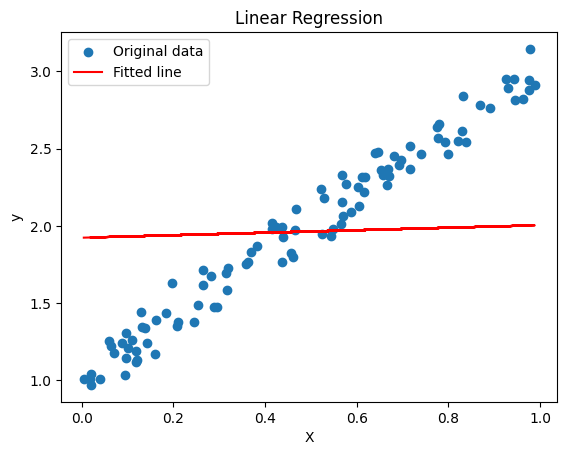

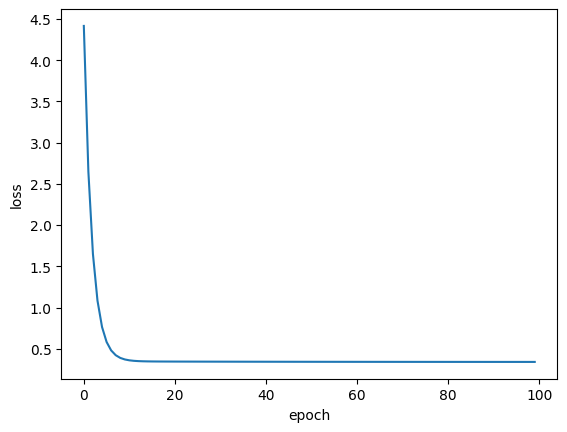

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# generate data randomly
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 0.1

# convert data into tesnsors
X_tensor = torch.tensor(X, dtype = torch.float32)
y_tensor = torch.tensor(y, dtype = torch.float32)

# initialize weights
w = torch.randn(1, requires_grad = True)
b = torch.randn(1, requires_grad = True)

# set learning rate and number of epochs
learning_rate = 0.1
epochs = 100
losses = []

# train
for epoch in range(epochs):
    # predict
    y_pred = torch.matmul(X_tensor, w) + b

    # calculate loss (MSE)
    loss = torch.mean((y_pred - y_tensor)**2)

    # backpropagation
    loss.backward()
    losses.append(loss.item())

    # update the weights
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # return the gardients into zero
        w.grad.zero_()
        b.grad.zero_()

    if epoch == 0 or epoch % 10 == 9:
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

print(f"Trained weights: w = {w.item()}, b = {b.item()}")

# plot the result
plt.scatter(X, y, label = "Original data")
plt.plot(X, w.detach().numpy() * X + b.detach().numpy(), color = "red", label = "Fitted line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()

plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

## Practice

In [5]:
import torch
import csv
import numpy as np
import matplotlib.pyplot as plt

# import data
def remove_comma(n):
    while "," in n:
        n = n.replace(",", "")

    return float(n)

# import data
y, x1, x2, x3 = [], [], [], []
with open("data.csv", encoding = "utf-8") as f:
    reader = list(csv.reader(f))
    print(reader[0])

    for row in reader[1: ]:
        y.append([remove_comma(row[4])])
        x1.append([remove_comma(row[3])])
        x2.append([remove_comma(row[2])])
        x3.append([remove_comma(row[1])])

# convert data into tensor
y = torch.tensor(y, dtype = torch.float32)
x1 = torch.tensor(x1, dtype = torch.float32)
x2 = torch.tensor(x2, dtype = torch.float32)
x3 = torch.tensor(x3, dtype = torch.float32)

# initialize the weights
w1 = torch.randn(1, requires_grad = True)
w2 = torch.randn(1, requires_grad = True)
w3 = torch.randn(1, requires_grad = True)
w4 = torch.randn(1, requires_grad = True)

# set learning rate and number of epochs
learning_rate = 1e-8
epochs = 100
losses = []

# train
for epoch in range(epochs):
    y_pred = torch.matmul(x1, w1) + torch.matmul(x2, w2) + torch.matmul(x3, w3) + w4
    loss = torch.mean((y_pred - y)**2)

    loss.backward()
    losses.append(loss.item())

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w3 -= learning_rate * w2.grad
        w4 -= learning_rate * w2.grad
        
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        w4.grad.zero_()

    if epoch in range(10) or epoch % 10 == 9:
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

print(f"Trained weights: w1 = {w1.item()}, w2 = {w2.item()}, w3 = {w3.item()}, w4 = {w4.item()}")

# plot the result
# plt.scatter(X, y, label = "Original data")
# plt.plot(X, w.detach().numpy() * X + b.detach().numpy(), color = "red", label = "Fitted line")
# plt.xlabel("X")
# plt.ylabel("y")
# plt.title("Linear Regression")
# plt.legend()
# plt.show()

# plt.plot(losses)
# plt.xlabel("epoch")
# plt.ylabel("loss")
# plt.show()

['\ufeff年度', '風力(萬瓩)', '太陽電(萬瓩)', '其他(含水力)(萬瓩)', '總計(萬瓩)']
Epoch 1, Loss: 612099.125
Epoch 2, Loss: 610289.125
Epoch 3, Loss: 608496.25
Epoch 4, Loss: 606720.375
Epoch 5, Loss: 604961.25
Epoch 6, Loss: 603218.6875
Epoch 7, Loss: 601492.5625
Epoch 8, Loss: 599782.5625
Epoch 9, Loss: 598088.625
Epoch 10, Loss: 596410.75
Epoch 20, Loss: 580468.3125
Epoch 30, Loss: 565939.125
Epoch 40, Loss: 552679.5
Epoch 50, Loss: 540560.625
Epoch 60, Loss: 529466.625
Epoch 70, Loss: 519293.46875
Epoch 80, Loss: 509947.875
Epoch 90, Loss: 501345.875
Epoch 100, Loss: 493412.21875
Trained weights: w1 = -0.47534555196762085, w2 = 1.302370309829712, w3 = 0.9568878412246704, w4 = 1.0675451755523682
